<a href="https://colab.research.google.com/github/onedayzero/Nintendo-Switch-Sales/blob/main/Data_Visualization_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization Exercise
- Clint Atterberry
- 8 June 2022

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Get content loaded as df
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTclcnNFKou53rrNVijGguF3eOrTtWZu5tlCi_8fcRvejHDn7_um6g1E8OEL2DSjA/pub?output=xlsx'
df = pd.read_excel(filename)
df.head()

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60.0,378.0,385.0,521.0
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120.0,594.0,688.0,811.0
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76.0,379.0,455.0,534.0
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18.0,154.0,169.0,237.0
4,Nintendo Switch software/Japan,ten thousand units (software),89.0,1226.0,2148.0,3256.0


In [ ]:
df.shape

(8, 6)

In [ ]:
# Renaming columns to remove spaces and to simplify the years.
df = df.rename(
    columns={
        '3/2017':'2017',
        '3/2018':'2018',
        '3/2019':'2019',
        '3/2020':'2020',
        'Nintendo Switch Platform':'location' # only the location makes sense
    }
)
df

,location,Metric,2017,2018,2019,2020
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60.0,378.0,385.0,521.0
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120.0,594.0,688.0,811.0
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76.0,379.0,455.0,534.0
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18.0,154.0,169.0,237.0
4,Nintendo Switch software/Japan,ten thousand units (software),89.0,1226.0,2148.0,3256.0
5,Nintendo Switch software/The Americas,ten thousand units (software),286.0,2752.0,5394.0,7428.0
6,Nintendo Switch software/Europe,ten thousand units (software),142.0,1917.0,3516.0,5017.0
7,Nintendo Switch software/Other,ten thousand units (software),29.0,456.0,797.0,1171.0


In [ ]:
# Making a new column based on type, hardware or software
df['product_type'] = df['Metric']
df.head()

,location,Metric,2017,2018,2019,2020,product_type
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60.0,378.0,385.0,521.0,ten thousand units (hardware)
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120.0,594.0,688.0,811.0,ten thousand units (hardware)
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76.0,379.0,455.0,534.0,ten thousand units (hardware)
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18.0,154.0,169.0,237.0,ten thousand units (hardware)
4,Nintendo Switch software/Japan,ten thousand units (software),89.0,1226.0,2148.0,3256.0,ten thousand units (software)


In [ ]:
# Modifying data so that just the product type is shown
df['product_type'] = df['product_type'].replace('ten thousand units (hardware)', 'hardware')
df['product_type'] = df['product_type'].replace('ten thousand units (software)', 'software')
df.head()

,location,Metric,2017,2018,2019,2020,product_type
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60.0,378.0,385.0,521.0,hardware
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120.0,594.0,688.0,811.0,hardware
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76.0,379.0,455.0,534.0,hardware
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18.0,154.0,169.0,237.0,hardware
4,Nintendo Switch software/Japan,ten thousand units (software),89.0,1226.0,2148.0,3256.0,software


In [ ]:
df = df.drop(['Metric'], axis = 1)
df

,location,2017,2018,2019,2020,product_type
0,Nintendo Switch hardware/Japan,60.0,378.0,385.0,521.0,hardware
1,Nintendo Switch hardware/The Americas,120.0,594.0,688.0,811.0,hardware
2,Nintendo Switch hardware/Europe,76.0,379.0,455.0,534.0,hardware
3,Nintendo Switch hardware/Other,18.0,154.0,169.0,237.0,hardware
4,Nintendo Switch software/Japan,89.0,1226.0,2148.0,3256.0,software
5,Nintendo Switch software/The Americas,286.0,2752.0,5394.0,7428.0,software
6,Nintendo Switch software/Europe,142.0,1917.0,3516.0,5017.0,software
7,Nintendo Switch software/Other,29.0,456.0,797.0,1171.0,software


In [ ]:
# Making the location the focus in the location column\
df['location'] = df['location'].str.replace('Nintendo Switch hardware/', '')
df['location'] = df['location'].str.replace('Nintendo Switch software/', '')
df

,location,2017,2018,2019,2020,product_type
0,Japan,60.0,378.0,385.0,521.0,hardware
1,The Americas,120.0,594.0,688.0,811.0,hardware
2,Europe,76.0,379.0,455.0,534.0,hardware
3,Other,18.0,154.0,169.0,237.0,hardware
4,Japan,89.0,1226.0,2148.0,3256.0,software
5,The Americas,286.0,2752.0,5394.0,7428.0,software
6,Europe,142.0,1917.0,3516.0,5017.0,software
7,Other,29.0,456.0,797.0,1171.0,software


In [ ]:
# info about columns, lookinf for float vs int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      8 non-null      object 
 1   2017          8 non-null      float64
 2   2018          8 non-null      float64
 3   2019          8 non-null      float64
 4   2020          8 non-null      float64
 5   product_type  8 non-null      object 
dtypes: float64(4), object(2)
memory usage: 512.0+ bytes


In [ ]:
df_h = df[df['product_type'] == 'hardware']
df_h

,location,2017,2018,2019,2020,product_type
0,Japan,60.0,378.0,385.0,521.0,hardware
1,The Americas,120.0,594.0,688.0,811.0,hardware
2,Europe,76.0,379.0,455.0,534.0,hardware
3,Other,18.0,154.0,169.0,237.0,hardware


In [ ]:
df_s = df[df['product_type'] == 'software']
df_s

,location,2017,2018,2019,2020,product_type
4,Japan,89.0,1226.0,2148.0,3256.0,software
5,The Americas,286.0,2752.0,5394.0,7428.0,software
6,Europe,142.0,1917.0,3516.0,5017.0,software
7,Other,29.0,456.0,797.0,1171.0,software


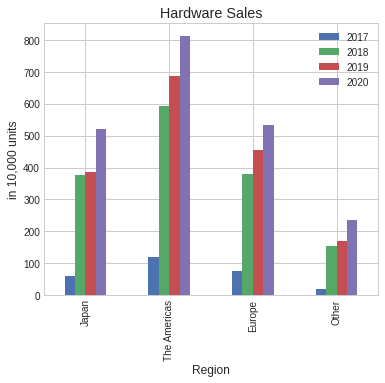

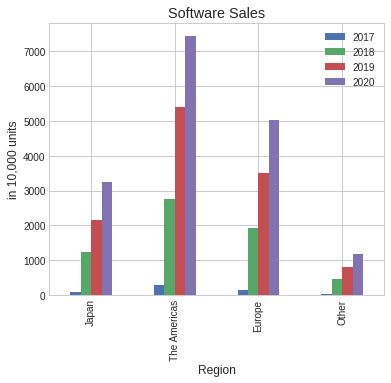

In [ ]:
# https://towardsdatascience.com/styling-pandas-plots-and-charts-9b4721e9e597
# as reference

plt.style.use('seaborn-whitegrid')

df_h.plot(
    x='location',
    y=['2017', '2018', '2019', '2020'],
    kind='bar',
    figsize=(6, 5),
    title='Hardware Sales',
    xlabel='Region',
    ylabel='in 10,000 units'
);
df_s.plot(
    x='location',
    y=['2017', '2018', '2019', '2020'],
    kind='bar',
    figsize=(6, 5),
    title='Software Sales',
    xlabel='Region',
    ylabel='in 10,000 units'
);